In [1]:
#Travel insurance prediction

In [2]:
# import liberaries
import glob
from keras.models import Sequential, load_model
import numpy as np
import pandas as pd
from sklearn.metrics import accuracy_score
from keras.layers import Dense
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.naive_bayes import GaussianNB
import matplotlib.pyplot as plt
import keras as k
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline
# from scipy.io import arff
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix
from matplotlib import pyplot as plt
from matplotlib import style

In [3]:
travel = 'travel.csv'
df = pd.read_csv(travel)

In [4]:
df.head()

,Unnamed: 0,Age,Employment Type,GraduateOrNot,AnnualIncome,FamilyMembers,ChronicDiseases,FrequentFlyer,EverTravelledAbroad,TravelInsurance
0,0,31,Government Sector,Yes,400000,6,1,No,No,0
1,1,31,Private Sector/Self Employed,Yes,1250000,7,0,No,No,0
2,2,34,Private Sector/Self Employed,Yes,500000,4,1,No,No,1
3,3,28,Private Sector/Self Employed,Yes,700000,3,1,No,No,0
4,4,28,Private Sector/Self Employed,Yes,700000,8,1,Yes,No,0


In [5]:
df.shape

(1987, 10)

In [6]:
import pip
pip.main(['install','seaborn'])

Please see https://github.com/pypa/pip/issues/5599 for advice on fixing the underlying issue.
To avoid this problem you can invoke Python with '-m pip' instead of running pip directly.


Requirement already satisfied: seaborn in /opt/conda/lib/python3.9/site-packages (0.11.2)

Requirement already satisfied: pandas>=0.23 in /opt/conda/lib/python3.9/site-packages (from seaborn) (1.2.4)

Requirement already satisfied: numpy>=1.15 in /opt/conda/lib/python3.9/site-packages (from seaborn) (1.22.2)

Requirement already satisfied: matplotlib>=2.2 in /opt/conda/lib/python3.9/site-packages (from seaborn) (3.4.1)

Requirement already satisfied: scipy>=1.0 in /opt/conda/lib/python3.9/site-packages (from seaborn) (1.6.3)

Requirement already satisfied: pillow>=6.2.0 in /opt/conda/lib/python3.9/site-packages (from matplotlib>=2.2->seaborn) (8.3.2)

Requirement already satisfied: python-dateutil>=2.7 in /opt/conda/lib/python3.9/site-packages (from matplotlib>=2.2->seaborn) (2.8.2)

Requirement already satisfied: kiwisolver>=1.0.1 in /opt/conda/lib/python3.9/site-packages (from matplotlib>=2.2->seaborn) (1.3.2)

Requirement already satisfied: pyparsing>=2.2.1 in /opt/conda/lib/python3.9/site-packages (from matplotlib>=2.2->seaborn) (2.4.7)

Requirement already satisfied: cycler>=0.10 in /opt/conda/lib/python3.9/site-packages (from matplotlib>=2.2->seaborn) (0.11.0)

Requirement already satisfied: pytz>=2017.3 in /opt/conda/lib/python3.9/site-packages (from pandas>=0.23->seaborn) (2021.1)

Requirement already satisfied: six>=1.5 in /opt/conda/lib/python3.9/site-packages (from python-dateutil>=2.7->matplotlib>=2.2->seaborn) (1.16.0)

0

In [7]:
import seaborn as sns

In [8]:
#to check if there are moissng values
df.isna().sum()   #no missing value

Unnamed: 0             0
Age                    0
Employment Type        0
GraduateOrNot          0
AnnualIncome           0
FamilyMembers          0
ChronicDiseases        0
FrequentFlyer          0
EverTravelledAbroad    0
TravelInsurance        0
dtype: int64

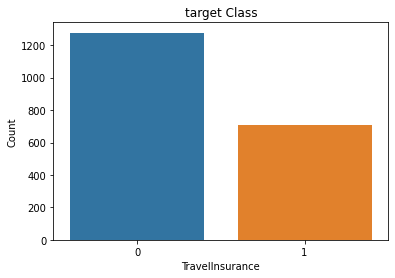

Percent of Yes TravelInsurance:  0.0 %
Percent of No TravelInsurance:  0.0 %


In [9]:
sns.countplot(x='TravelInsurance',data=df)
plt.xlabel("TravelInsurance")
plt.ylabel("Count")
plt.title("target Class")
plt.show()
print('Percent of Yes TravelInsurance: ',round(len(df[df['TravelInsurance']== '1'])/len(df['TravelInsurance'])*100,2),"%")
print('Percent of No TravelInsurance: ',round(len(df[df['TravelInsurance']== '0'])/len(df['TravelInsurance'])*100,2),"%")

In [10]:
df.dtypes

Unnamed: 0              int64
Age                     int64
Employment Type        object
GraduateOrNot          object
AnnualIncome            int64
FamilyMembers           int64
ChronicDiseases         int64
FrequentFlyer          object
EverTravelledAbroad    object
TravelInsurance         int64
dtype: object

In [11]:
df['Employment Type'].unique()

array(['Government Sector', 'Private Sector/Self Employed'], dtype=object)

In [12]:
df['GraduateOrNot'].unique()

array(['Yes', 'No'], dtype=object)

In [13]:
df['FrequentFlyer'].unique()

array(['No', 'Yes'], dtype=object)

In [14]:
df['EverTravelledAbroad'].unique()

array(['No', 'Yes'], dtype=object)

In [15]:
# Converting Categorical 'Employment Type' col to Numeric value
df['Employment Type'] = np.where(df['Employment Type']=='Government Sector', 1, 0) #Government Sector is 1 , while Private Sector/Self Employed is 0
df['GraduateOrNot'] = np.where(df['GraduateOrNot']=='yes', 1, 0) #yes is 1 , no is 0
df['FrequentFlyer'] = np.where(df['FrequentFlyer']=='yes', 1, 0)  #yes is 1 , no is 0
df['EverTravelledAbroad'] = np.where(df['EverTravelledAbroad']=='yes', 1, 0)  #yes is 1 , no is 0

In [16]:
#let's check the newly transfromed data

In [17]:
df.head()

,Unnamed: 0,Age,Employment Type,GraduateOrNot,AnnualIncome,FamilyMembers,ChronicDiseases,FrequentFlyer,EverTravelledAbroad,TravelInsurance
0,0,31,1,0,400000,6,1,0,0,0
1,1,31,0,0,1250000,7,0,0,0,0
2,2,34,0,0,500000,4,1,0,0,1
3,3,28,0,0,700000,3,1,0,0,0
4,4,28,0,0,700000,8,1,0,0,0


In [18]:
#drop unnamed
df.drop(['Unnamed: 0'], axis = 1)

,Age,Employment Type,GraduateOrNot,AnnualIncome,FamilyMembers,ChronicDiseases,FrequentFlyer,EverTravelledAbroad,TravelInsurance
0,31,1,0,400000,6,1,0,0,0
1,31,0,0,1250000,7,0,0,0,0
2,34,0,0,500000,4,1,0,0,1
3,28,0,0,700000,3,1,0,0,0
4,28,0,0,700000,8,1,0,0,0
...,...,...,...,...,...,...,...,...,...
1982,33,0,0,1500000,4,0,0,0,1
1983,28,0,0,1750000,5,1,0,0,0
1984,28,0,0,1150000,6,1,0,0,0
1985,34,0,0,1000000,6,0,0,0,1


In [19]:
#checking correlation between variables

In [20]:
import pip
pip.main(['install','seaborn'])

Please see https://github.com/pypa/pip/issues/5599 for advice on fixing the underlying issue.
To avoid this problem you can invoke Python with '-m pip' instead of running pip directly.


Requirement already satisfied: seaborn in /opt/conda/lib/python3.9/site-packages (0.11.2)

Requirement already satisfied: pandas>=0.23 in /opt/conda/lib/python3.9/site-packages (from seaborn) (1.2.4)

Requirement already satisfied: numpy>=1.15 in /opt/conda/lib/python3.9/site-packages (from seaborn) (1.22.2)

Requirement already satisfied: matplotlib>=2.2 in /opt/conda/lib/python3.9/site-packages (from seaborn) (3.4.1)

Requirement already satisfied: scipy>=1.0 in /opt/conda/lib/python3.9/site-packages (from seaborn) (1.6.3)

Requirement already satisfied: pillow>=6.2.0 in /opt/conda/lib/python3.9/site-packages (from matplotlib>=2.2->seaborn) (8.3.2)

Requirement already satisfied: python-dateutil>=2.7 in /opt/conda/lib/python3.9/site-packages (from matplotlib>=2.2->seaborn) (2.8.2)

Requirement already satisfied: kiwisolver>=1.0.1 in /opt/conda/lib/python3.9/site-packages (from matplotlib>=2.2->seaborn) (1.3.2)

Requirement already satisfied: pyparsing>=2.2.1 in /opt/conda/lib/python3.9/site-packages (from matplotlib>=2.2->seaborn) (2.4.7)

Requirement already satisfied: cycler>=0.10 in /opt/conda/lib/python3.9/site-packages (from matplotlib>=2.2->seaborn) (0.11.0)

Requirement already satisfied: pytz>=2017.3 in /opt/conda/lib/python3.9/site-packages (from pandas>=0.23->seaborn) (2021.1)

Requirement already satisfied: six>=1.5 in /opt/conda/lib/python3.9/site-packages (from python-dateutil>=2.7->matplotlib>=2.2->seaborn) (1.16.0)

0

In [21]:
import seaborn as sns

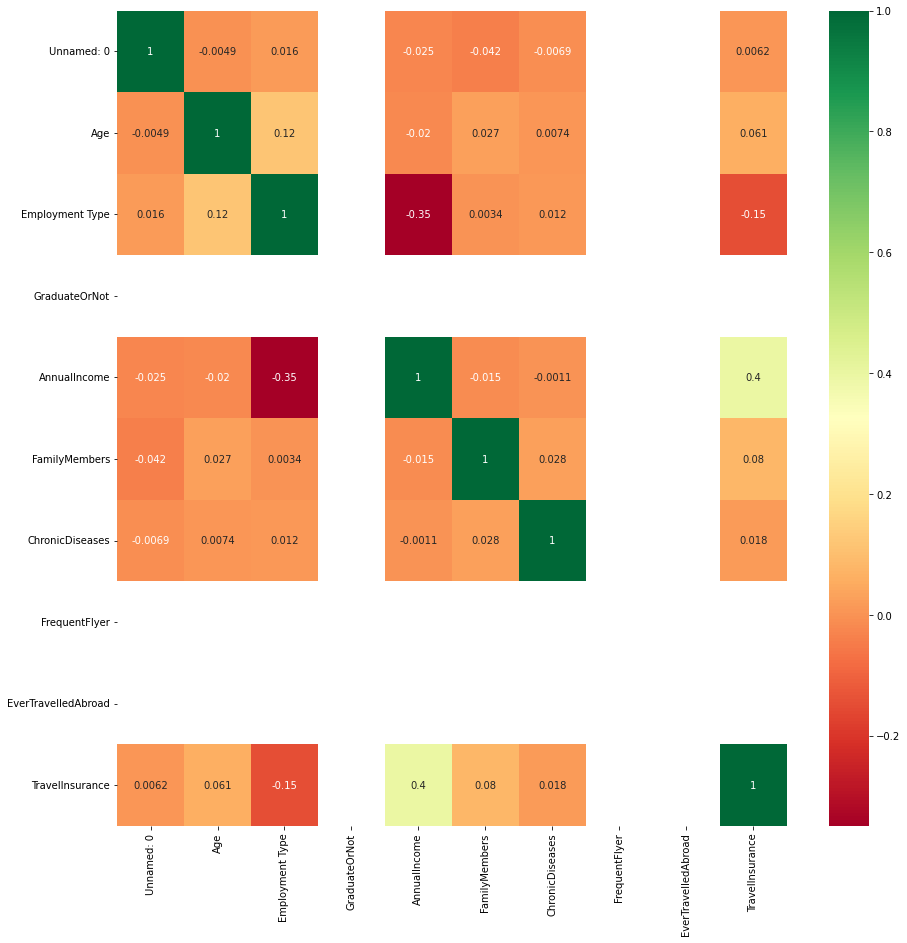

In [22]:
#get correlations of each features in dataset
import seaborn as sn
corrmat = df.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(15,15))
#plot heat map
df_heatmap=sns.heatmap(df[top_corr_features].corr(),annot=True,cmap="RdYlGn")

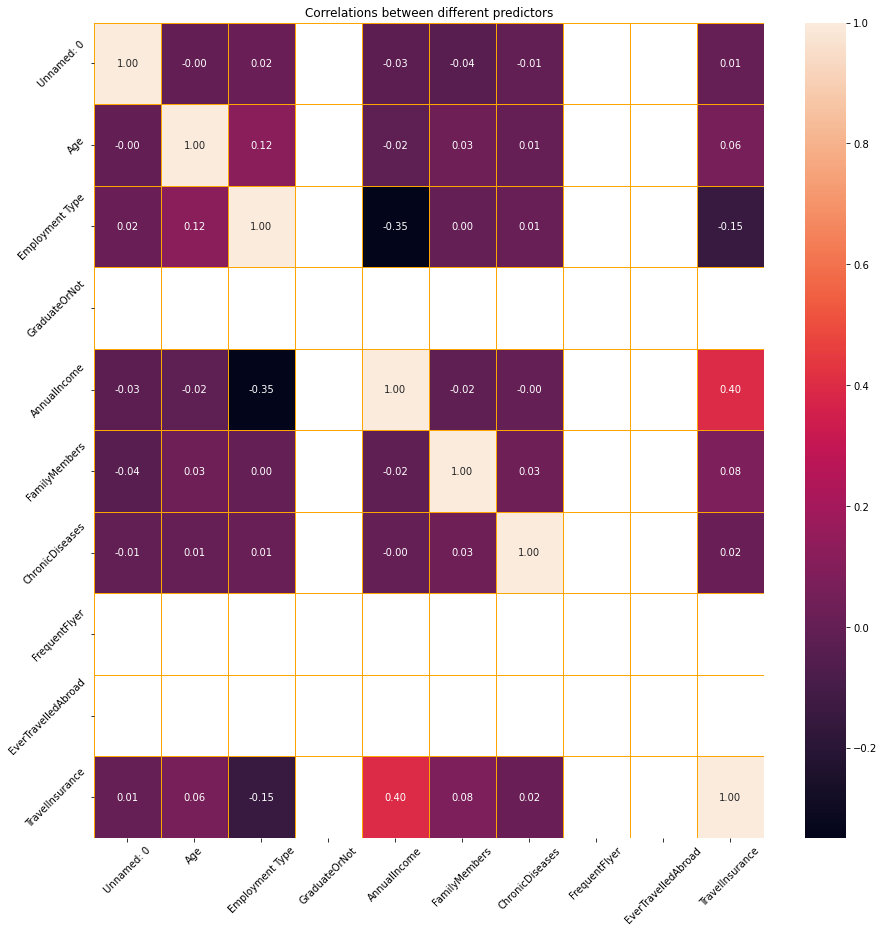

In [23]:
corr_df = df.corr()
f,ax=plt.subplots(figsize=(15,15))
sns.heatmap(corr_df,annot=True,fmt=".2f",ax=ax,linewidths=0.5,linecolor="orange")
plt.xticks(rotation=45)
plt.yticks(rotation=45)
plt.title('Correlations between different predictors')
plt.show()

In [24]:
df.head()

,Unnamed: 0,Age,Employment Type,GraduateOrNot,AnnualIncome,FamilyMembers,ChronicDiseases,FrequentFlyer,EverTravelledAbroad,TravelInsurance
0,0,31,1,0,400000,6,1,0,0,0
1,1,31,0,0,1250000,7,0,0,0,0
2,2,34,0,0,500000,4,1,0,0,1
3,3,28,0,0,700000,3,1,0,0,0
4,4,28,0,0,700000,8,1,0,0,0


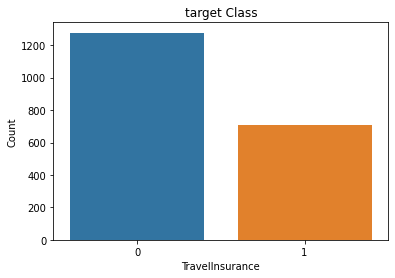

Percent of Yes TravelInsurance:  0.0 %
Percent of No TravelInsurance:  0.0 %


In [25]:
sns.countplot(x='TravelInsurance',data=df)
plt.xlabel("TravelInsurance")
plt.ylabel("Count")
plt.title("target Class")
plt.show()
print('Percent of Yes TravelInsurance: ',round(len(df[df['TravelInsurance']== 'ckd'])/len(df['TravelInsurance'])*100,2),"%")
print('Percent of No TravelInsurance: ',round(len(df[df['TravelInsurance']== 'notckd'])/len(df['TravelInsurance'])*100,2),"%")

In [26]:
df.describe()

,Unnamed: 0,Age,Employment Type,GraduateOrNot,AnnualIncome,FamilyMembers,ChronicDiseases,FrequentFlyer,EverTravelledAbroad,TravelInsurance
count,1987.000000,1987.000000,1987.000000,1987.0,1.987000e+03,1987.000000,1987.000000,1987.0,1987.0,1987.000000
mean,993.000000,29.650226,0.286865,0.0,9.327630e+05,4.752894,0.277806,0.0,0.0,0.357323
std,573.741812,2.913308,0.452412,0.0,3.768557e+05,1.609650,0.448030,0.0,0.0,0.479332
min,0.000000,25.000000,0.000000,0.0,3.000000e+05,2.000000,0.000000,0.0,0.0,0.000000
25%,496.500000,28.000000,0.000000,0.0,6.000000e+05,4.000000,0.000000,0.0,0.0,0.000000
50%,993.000000,29.000000,0.000000,0.0,9.000000e+05,5.000000,0.000000,0.0,0.0,0.000000
75%,1489.500000,32.000000,1.000000,0.0,1.250000e+06,6.000000,1.000000,0.0,0.0,1.000000
max,1986.000000,35.000000,1.000000,0.0,1.800000e+06,9.000000,1.000000,0.0,0.0,1.000000


In [27]:
#split the data into independent (x) data set (the features) and dependent (y) dataset (the target)
X= df.drop(['TravelInsurance'], axis = 1) #to drop the column  classification
y= df['TravelInsurance'] #ti contains all target that we want

In [28]:
#feature scaling  #Scaling data to standard deviation range to reduce computing and increase model performence
#min-max scaler method sclaes the dataset so that all the input feautres lie between 0 and 1
#x_scaler = MinMaxScaler()
#x_scaler.fit(X)
#column_names = X.columns
#X[column_names] = x_scaler.transform(X)
x_scaler = MinMaxScaler()
x_scaler.fit(X)
column_names = X.columns
X[column_names] = x_scaler.transform(X)

In [29]:
X.shape

(1987, 9)

In [30]:
#Split the data into 80% training and 20% testing and shuffle
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, shuffle=True)

In [31]:
# defining dependent y
y = df.iloc[:, -1]
y.head(3)

0    0
1    0
2    1
Name: TravelInsurance, dtype: int64

In [32]:
#print the shape of the new x objects
print (X_train.shape)
print (X_test.shape)

(1589, 9)
(398, 9)


In [33]:
#print the shape of the new y objects 287 total patients after dropping nan . 229 for tain 58 patients for testing
print (y_train.shape)
print (y_test.shape)

(1589,)
(398,)


In [34]:
# Model Building

In [35]:
# Multilayer Perceptron (MLP)

In [36]:
#build the model multi linear perceptron #256 neurons, len(X.columns)  is number of features in our dataset
mlp= Sequential()
mlp.add( Dense (256, input_dim = len(X.columns), kernel_initializer= k.initializers.random_normal(seed=13), activation= 'relu') )
mlp.add( Dense(1, activation='hard_sigmoid') )

In [37]:
#compile the model #crossentropy: fn used for binary classess or 2 classses yto classsify if a person has ckd or not
#loss fn measures how well the model does the training
#optimizer =adam
mlp.compile(loss='binary_crossentropy', optimizer= 'adam', metrics=['accuracy'])

In [ ]:
#train the model
#epochs is the number of genration over the entire data set to train on
#batch size is the number of several graidient for training
history = mlp.fit(X_train, y_train, epochs = (2000), batch_size = X_train.shape[0])

Epoch 1/2000
1/1 [==============================] - 0s 367ms/step - loss: 0.6930 - accuracy: 0.4777
Epoch 2/2000
1/1 [==============================] - 0s 7ms/step - loss: 0.6890 - accuracy: 0.5809
Epoch 3/2000
1/1 [==============================] - 0s 6ms/step - loss: 0.6853 - accuracy: 0.6425
Epoch 4/2000
1/1 [==============================] - 0s 6ms/step - loss: 0.6818 - accuracy: 0.6463
Epoch 5/2000
1/1 [==============================] - 0s 30ms/step - loss: 0.6785 - accuracy: 0.6457
Epoch 6/2000
1/1 [==============================] - 0s 7ms/step - loss: 0.6755 - accuracy: 0.6457
Epoch 7/2000
1/1 [==============================] - 0s 8ms/step - loss: 0.6727 - accuracy: 0.6457
Epoch 8/2000
1/1 [==============================] - 0s 7ms/step - loss: 0.6700 - accuracy: 0.6457
Epoch 9/2000
1/1 [==============================] - 0s 7ms/step - loss: 0.6676 - accuracy: 0.6457
Epoch 10/2000
1/1 [==============================] - 0s 8ms/step - loss: 0.6653 - accuracy: 0.6457
Epoch 11/2000
1/

In [ ]:
#save the model
mlp.save('travelinsurance.model')

In [ ]:
#visualise the model loss and accuracy
plt.plot(history.history['accuracy'], label='Accuracy')
plt.plot(history.history['loss'],label= 'Loss')
plt.title('Model Accuracy and Loss')
plt.ylabel('Accuracy and Loss')
plt.xlabel('Epochs')
plt.legend();

In [ ]:
#to check if the patient has ckd or not
#get the shape of the training and the testing data
#training data 229 pateints rows and 6 colums datapoints
#test data 58 pateints row and 6 colums datapoints

print('shape of the training data:', X_train.shape)
print('shape of the test data', X_test.shape)

In [ ]:
#to see how the model preidcts and diagnos patients
mlp_pred= mlp.predict(X_test)
mlp_pred= [1 if y>=0.5 else 0 for y in mlp_pred] #when using ANN , we can get probability and make 1 if y>=0.5 else 0. 0.5 is the threshold
mlp_pred

In [ ]:
#show the actual values. if the patient actually has ckd or not
y_test

In [ ]:
#show the actual and predicted values side by side
print('Original: {0}'.format(", ".join(str(x) for x in y_test)))
print('Predicted: {0}'.format(", ".join(str(x) for x in mlp_pred)))

In [ ]:
from sklearn.metrics import accuracy_score
mlp_acc = round(accuracy_score(y_test, mlp_pred)*100, 2)
print(f'Multi Layer Perceptron Model Accuracy: {mlp_acc}%')

In [ ]:
mlp_conf_matrix = confusion_matrix(y_test, mlp_pred)
mlp_conf_matrix

In [ ]:
sns.heatmap(mlp_conf_matrix, annot=True)
plt.xlabel('predicted')
plt.ylabel('Truth')

In [ ]:
tn, fp, fn, tp = confusion_matrix(y_test, mlp_pred).ravel()

print(f'True Neg: {tn}')
print(f'False Pos: {fp}')
print(f'False Neg: {fn}')
print(f'True Pos: {tp}')

In [ ]:
mlp_classification_report = classification_report(y_test, mlp_pred)
print(mlp_classification_report)

In [ ]:
#Random forest

In [ ]:
#Random Forest Classifier
rf = RandomForestClassifier(max_depth=20, n_estimators=21)
rf.fit(X_train, y_train)
RandomForestClassifier(max_depth=20, n_estimators=21)
rf_pred = rf.predict(X_test)
rf_pred

In [ ]:
# Checking Model prediction accuracy
rf_acc = round(accuracy_score(y_test, rf_pred)*100, 2)
print(f'Random Forest Accuracy: {rf_acc}%')

In [ ]:
#Tuning Model Accuracy using Cross Validation and n_estimators
from sklearn.model_selection import cross_val_score

rf_accuracy = []
for n in range(10, 30):
	rf = RandomForestClassifier(n_estimators=n)
	acc = cross_val_score(rf, X, y, cv=10)
	rf_accuracy.append(round(acc.mean()*100, 2))
rf_accuracy

In [ ]:
rf_conf_matrix = confusion_matrix(y_test, rf_pred)
rf_conf_matrix

In [ ]:
sns.heatmap(rf_conf_matrix, annot=True)
plt.xlabel('predicted')
plt.ylabel('Truth')

In [ ]:
tn, fp, fn, tp = confusion_matrix(y_test, rf_pred).ravel()

print(f'True Neg: {tn}')
print(f'False Pos: {fp}')
print(f'False Neg: {fn}')
print(f'True Pos: {tp}')

In [ ]:
rf_classification_report = classification_report(y_test, rf_pred)
print(rf_classification_report)

In [ ]:
#compare model
 
models = pd.DataFrame({
    'Model' : [ 'MLP', 'Random Forest Classifier' ],
    'Score' : [ mlp_acc, rf_acc]
})


models.sort_values(by = 'Score', ascending = False)

In [ ]:
plt.figure(figsize=(15, 6))
models = ['Random Forest Classifier',  'Multilayer Perceptron']
models_acc =  [rf_acc, mlp_acc ]
# xax = [1, 2, 3, 4, 5]

plt.title('Travelinsurance Prediction Model Accuracy Plot')
plt.bar(models, models_acc, label=models)
plt.xticks(models, rotation=40, ha='right')
plt.ylabel('Parcentage Accuracy %')
plt.xlabel('Machine Learning Models')
# plt.legend()

# plt.savefig('figName.png', dpi=300)
plt.show()